<a href="https://colab.research.google.com/github/Gadgeteering/Lego-Machine-Learning-Dataset/blob/master/Copy_of_External_data_Local_Files%2C_Drive%2C_Sheets%2C_and_Cloud_Storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dropout, Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

import random
import glob
import os
import pathlib
import time
import matplotlib.pyplot as plt

import IPython.display as display

from google.colab import drive
drive.mount('/content/drive')

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)
    
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

# Function to load and preprocess each image

def _parse_fn(filename, label):
    img = tf.io.read_file(filename)
    img = tf.image.decode_png(img,3)
    img = (tf.cast(img, tf.float32)/127.5) - 1
    img = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    return img, label



def load_and_preprocess_image(path):
  labels=path.split('/')
  label=labels[8]
  return label

##train_path = '/Users/petesmac/Documents/Machine Learning/DATA/LEGO brick images/train'
##valid_path = '/Users/petesmac/Documents/Machine Learning/DATA/LEGO brick images/valid'

train_path = '/content/drive/My Drive/DATA/LEGO brick images/train'
valid_path = '/content/drive/My Drive/DATA/LEGO brick images/valid'
data_root = pathlib.Path(train_path)


label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print (label_names)

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=label_names, batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=label_names, batch_size=32)
##test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['beer', 'wings'], batch_size=32)

vgg16_model = tensorflow.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))

# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg16_model)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_batches,
      steps_per_epoch=train_batches.samples/train_batches.batch_size ,
      epochs=5,
      validation_data=valid_batches,
      validation_steps=valid_batches.samples/valid_batches.batch_size,
      verbose=1)




saved_model_path = "/content/drive/My Drive/tmp/saved_models/"+str(int(time.time()))
keras.experimental.export_saved_model(model, saved_model_path)
#tf.saved_model.save(vgg16_model, saved_model_path)
#model.save('Lego.h5')
#test_images = "LEGO brick images/test/test.jpeg"
#predictions = model.predict(test_images)
#predictions = model.predict(test_images)

#writer =tf.summary.FileWriter("/tmp/logs")
#writer.add_graph(sess.graph)


2.0.0-beta1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['11214 Bush 3M friction with Cross axle', '18651 Cross Axle 2M with Snap friction', '2357 Brick corner 1x2x2', '3003 Brick 2x2', '3004 Brick 1x2', '3005 Brick 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3024 Plate 1x1', '3040 Roof Tile 1x2x45deg', '3069 Flat Tile 1x2', '32123 half Bush', '3673 Peg 2M', '3713 Bush for Cross Axle', '3794 Plate 1X2 with 1 Knob', '6632 Technic Lever 3M']
Found 6379 images belonging to 16 classes.
Found 6399 images belonging to 16 classes.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
__________________________________

W0713 11:49:59.756634 139925817874304 export_utils.py:182] Export includes no default signature!
W0713 11:50:01.081169 139925817874304 export_utils.py:182] Export includes no default signature!


This notebook provides recipes for loading and saving data from external sources.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['11214 Bush 3M friction with Cross axle', '18651 Cross Axle 2M with Snap friction', '2357 Brick corner 1x2x2', '3003 Brick 2x2', '3004 Brick 1x2', '3005 Brick 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3024 Plate 1x1', '3040 Roof Tile 1x2x45deg', '3069 Flat Tile 1x2', '32123 half Bush', '3673 Peg 2M', '3713 Bush for Cross Axle', '3794 Plate 1X2 with 1 Knob', '6632 Technic Lever 3M']
(224, 224, 3)
(1, 16)
10


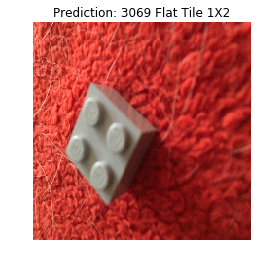

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
from tensorflow import keras

!pip install -q tensorflow_hub
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image
from google.colab import drive
import pathlib
drive.mount('/content/drive')
from tensorflow.keras import layers
train_path = '/content/drive/My Drive/DATA/LEGO brick images/train'
data_root = pathlib.Path(train_path)
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print (label_names)
saved_model_path = "/content/drive/My Drive/tmp/saved_models/1563018592/"
test_path = '/content/drive/My Drive/DATA/LEGO brick images/test/test5.JPG'
IMAGE_SHAPE = (224, 224)
classifier = keras.experimental.load_from_saved_model(saved_model_path)
img = Image.open(test_path).resize(IMAGE_SHAPE)
#print(img)
img = np.array(img)/255.0
print(img.shape)
result = classifier.predict(img[np.newaxis, ...])
print(result.shape)
#classifier.summary()
#print(classifier.predict(img).shape)
print(np.argmax(result[0]))
predicted_class = np.argmax(result[0], axis=-1)
#print(predicted_class)
#print(list(predicted_class))
#labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
#imagenet_labels = np.array(open(labels_path).read().splitlines())
plt.imshow(img)
plt.axis('off')
predicted_class_name = label_names[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
loaded = tf.saved_model.load("/content/drive/My Drive/tmp/saved_model/")

Files in GCS are contained in [buckets](https://cloud.google.com/storage/docs/key-terms#buckets).

Buckets must have a globally-unique name, so we generate one here.

In [0]:
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

In order to access GCS, we must authenticate.

In [0]:
from google.colab import auth
auth.authenticate_user()

GCS can be accessed via the `gsutil` command-line utility or via the native Python API.

## `gsutil`

First, we configure `gsutil` to use the project we specified above by using `gcloud`.

In [0]:
!gcloud config set project {project_id}

Updated property [core/project].


Create a local file to upload.

In [0]:
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

Make a bucket to which we'll upload the file ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/mb)).

In [0]:
!gsutil mb gs://{bucket_name}

Creating gs://colab-sample-bucket-44971372-baaf-11e7-ae30-0242ac110002/...


Copy the file to our new bucket ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/cp)).

In [0]:
!gsutil cp /tmp/to_upload.txt gs://{bucket_name}/

Copying file:///tmp/to_upload.txt [Content-Type=text/plain]...
/ [1 files][   14.0 B/   14.0 B]                                                
Operation completed over 1 objects/14.0 B.                                       


Dump the contents of our newly copied file to make sure everything worked ([documentation](https://cloud.google.com/storage/docs/gsutil/commands/cat)).


In [0]:
!gsutil cat gs://{bucket_name}/to_upload.txt

my sample file

In [0]:
#@markdown Once the upload has finished, the data will appear in the Cloud Console storage browser for your project:
print('https://console.cloud.google.com/storage/browser?project=' + project_id)

https://console.cloud.google.com/storage/browser?project=Your_project_ID_here


Finally, we'll download the file we just uploaded in the example above. It's as simple as reversing the order in the `gsutil cp` command.

In [0]:
!gsutil cp gs://{bucket_name}/to_upload.txt /tmp/gsutil_download.txt
  
# Print the result to make sure the transfer worked.
!cat /tmp/gsutil_download.txt

Copying gs://colab-sample-bucket483f20dc-baaf-11e7-ae30-0242ac110002/to_upload.txt...
/ [1 files][   14.0 B/   14.0 B]                                                
Operation completed over 1 objects/14.0 B.                                       
my sample file

## Python API

These snippets based on [a larger example](https://github.com/GoogleCloudPlatform/storage-file-transfer-json-python/blob/master/chunked_transfer.py) that shows additional uses of the API.

 First, we create the service client.

In [0]:
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

Create a local file to upload.

In [0]:
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

Create a bucket in the project specified above.

In [0]:
# Use a different globally-unique bucket name from the gsutil example above.
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

body = {
  'name': bucket_name,
  # For a full list of locations, see:
  # https://cloud.google.com/storage/docs/bucket-locations
  'location': 'us',
}
gcs_service.buckets().insert(project=project_id, body=body).execute()
print('Done')

Done


Upload the file to our newly created bucket.

In [0]:
from googleapiclient.http import MediaFileUpload

media = MediaFileUpload('/tmp/to_upload.txt', 
                        mimetype='text/plain',
                        resumable=True)

request = gcs_service.objects().insert(bucket=bucket_name, 
                                       name='to_upload.txt',
                                       media_body=media)

response = None
while response is None:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, response = request.next_chunk()

print('Upload complete')

Upload complete


In [0]:
#@markdown Once the upload has finished, the data will appear in the Cloud Console storage browser for your project:
print('https://console.cloud.google.com/storage/browser?project=' + project_id)

https://console.cloud.google.com/storage/browser?project=Your_project_ID_here


Download the file we just uploaded.

In [0]:
from apiclient.http import MediaIoBaseDownload

with open('/tmp/downloaded_from_gcs.txt', 'wb') as f:
  request = gcs_service.objects().get_media(bucket=bucket_name,
                                            object='to_upload.txt')
  media = MediaIoBaseDownload(f, request)

  done = False
  while not done:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = media.next_chunk()

print('Download complete')

Download complete


Inspect the downloaded file.


In [0]:
!cat /tmp/downloaded_from_gcs.txt

my sample file